# **Analyze and visualize sentiment patterns in social media data to understand public opinion and attitude towards specific topics or brands.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

In [4]:
df = pd.read_csv('/content/twitter_training.csv')

In [3]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
df.tail(20)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
46274,11941,Verizon,Positive,Thanks for helping small business. Life blood...
46275,11941,Verizon,Positive,Thanks for all helping small businesses. Sweet...
46276,11941,Verizon,Positive,Thanks for helping small businesses. Life bloo...
46277,11942,Verizon,Positive,This hour is full of live performances that we...
46278,11942,Verizon,Positive,This hour is full of live performances we've b...
46279,11942,Verizon,Positive,Join us at planetafon.com for @ Fisumi. I prom...
46280,11942,Verizon,Positive,This hour is full the amazing performances tha...
46281,11942,Verizon,Positive,and This hour here is so full of live singing ...
46282,11942,Verizon,Positive,This hour turns worth of live performances tha...
46283,11943,Verizon,Neutral,These stocks are at least worth looking at: – ...


In [5]:
df.rename(columns={'im getting on borderlands and i will murder you all ,': 'Sentences'}, inplace=True)

In [6]:
df.head()

,2401,Borderlands,Positive,Sentences
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
!python3 -m pip install nltk


In [9]:
import nltk
nltk.download('punkt')
nltk.download('Vader')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading Vader: Package 'Vader' not found in index


False

In [10]:
from nltk.tokenize import word_tokenize
#The sentence is broken down into smaller parts called tokens
text = "Hello, today we will learn about Python Sentiment Analysis with NLTK."
tokens = word_tokenize(text)
print(tokens)


['Hello', ',', 'today', 'we', 'will', 'learn', 'about', 'Python', 'Sentiment', 'Analysis', 'with', 'NLTK', '.']


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#This is how sentimental analysis actually works
# Initialize the VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Example sentence
sentence = "I love this product! It's amazing."

# Get sentiment scores
sentiment_scores = analyzer.polarity_scores(sentence)

# Interpret the scores
if sentiment_scores['compound'] > 0.05:
    sentiment = "Positive"
elif sentiment_scores['compound'] < -0.05:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

print(f"Sentence: {sentence}")
print(f"Sentiment: {sentiment}")


Sentence: I love this product! It's amazing.
Sentiment: Positive


In [12]:
df['compound'] = [analyzer.polarity_scores(str(x))['compound'] for x in df['Sentences']]
#This will privide the score of the sentiment

In [18]:
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the 'Sentences' column
df['Sentiment'] = df['Sentences'].apply(lambda x: "Positive" if isinstance(x, str) and analyzer.polarity_scores(x)['compound'] > 0.05
                                         else ("Negative" if isinstance(x, str) and analyzer.polarity_scores(x)['compound'] < -0.05
                                               else "Neutral"))

# Now your DataFrame 'df' has a new column 'sentiment' with the sentiment labels
print(df[['Sentences', 'Sentiment']])


                                               Sentences Sentiment
0      I am coming to the borders and I will kill you...  Negative
1      im getting on borderlands and i will kill you ...  Negative
2      im coming on borderlands and i will murder you...  Negative
3      im getting on borderlands 2 and i will murder ...  Negative
4      im getting into borderlands and i can murder y...  Negative
...                                                  ...       ...
74676  Just realized that the Windows partition of my...  Positive
74677  Just realized that my Mac window partition is ...  Negative
74678  Just realized the windows partition of my Mac ...  Negative
74679  Just realized between the windows partition of...  Positive
74680  Just like the windows partition of my Mac is l...  Positive

[74681 rows x 2 columns]


In [20]:
df.head()

,Borderlands,Sentences,compound,Sentiment
0,Borderlands,I am coming to the borders and I will kill you...,-0.6908,Negative
1,Borderlands,im getting on borderlands and i will kill you ...,-0.6908,Negative
2,Borderlands,im coming on borderlands and i will murder you...,-0.6908,Negative
3,Borderlands,im getting on borderlands 2 and i will murder ...,-0.6908,Negative
4,Borderlands,im getting into borderlands and i can murder y...,-0.6908,Negative


In [15]:
#Now since we have performed the sentimental analysis, we will dispose off the "Positive" and "2401" columns
df.drop('Positive', axis=1, inplace=True)
df.drop('2401', axis=1, inplace=True)

In [19]:
df.tail(10)

,Borderlands,Sentences,compound,Sentiment
74671,Nvidia,Let no elite go unnoticed... NVIDIA Highlights...,0.5093,Positive
74672,Nvidia,Let no elim go unnoticed.... NVIDIA Highlights...,0.6696,Positive
74673,Nvidia,Let a no information elim that go unnoticed......,0.6696,Positive
74674,Nvidia,<unk> my elim be no.... NVIDIA Highlights Pict...,0.7712,Positive
74675,Nvidia,Just realized the windows partition of my Mac ...,0.0772,Positive
74676,Nvidia,Just realized that the Windows partition of my...,0.0772,Positive
74677,Nvidia,Just realized that my Mac window partition is ...,-0.2960,Negative
74678,Nvidia,Just realized the windows partition of my Mac ...,-0.2960,Negative
74679,Nvidia,Just realized between the windows partition of...,0.0772,Positive
74680,Nvidia,Just like the windows partition of my Mac is l...,0.3687,Positive


# **Now we just have to visualize the data**

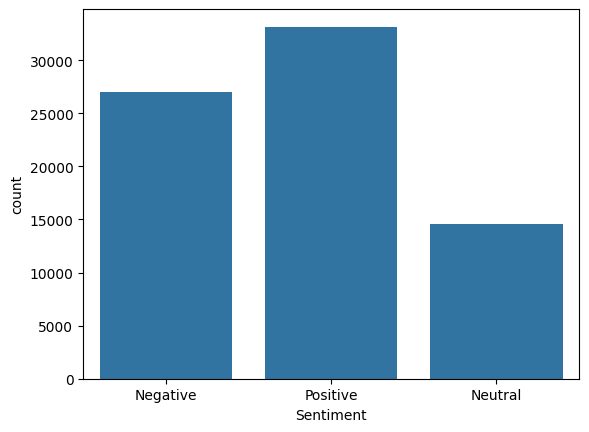

In [21]:
sns.countplot(x='Sentiment', data=df)
plt.show()

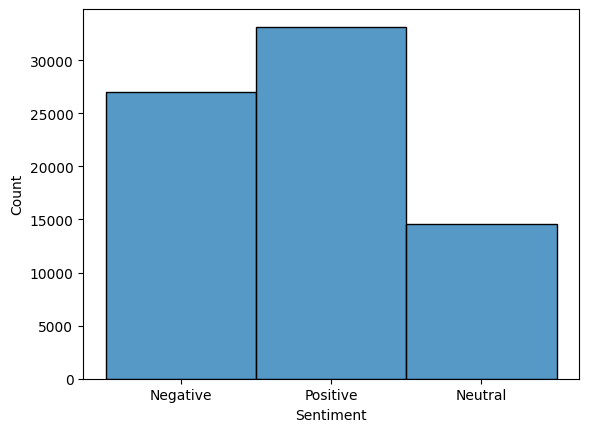

In [23]:
sns.histplot(df['Sentiment'])
plt.show()

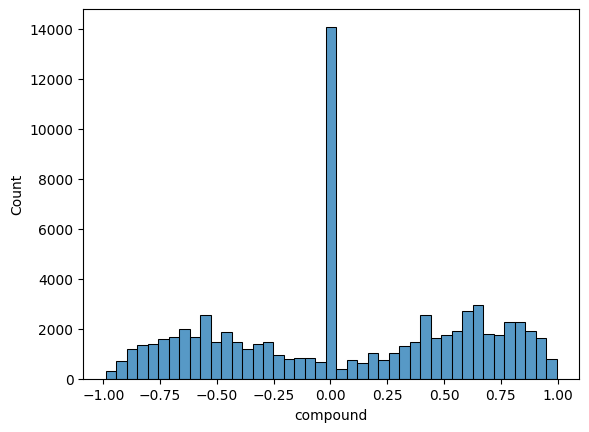

In [24]:
sns.histplot(df['compound'])
plt.show()

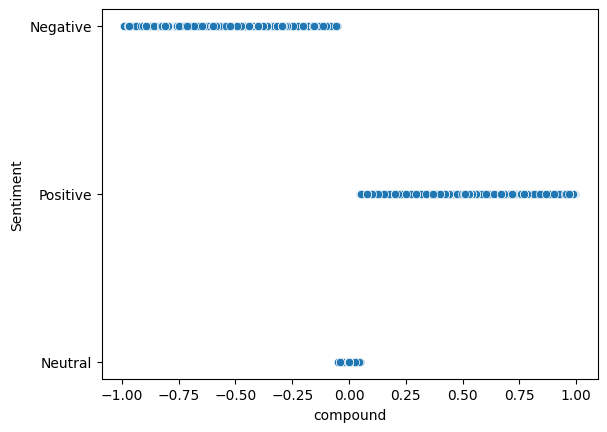

In [25]:
sns.scatterplot(x='compound', y='Sentiment', data=df)
plt.show()

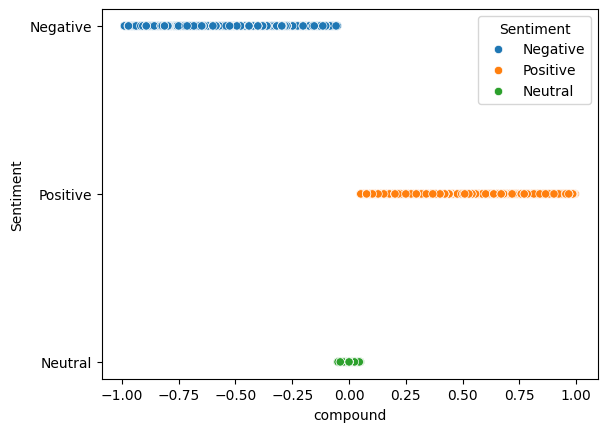

In [26]:
sns.scatterplot(x='compound', y='Sentiment', hue='Sentiment', data=df)
plt.show()

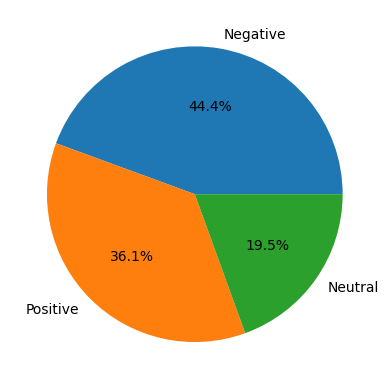

In [28]:
plt.pie(df['Sentiment'].value_counts(), labels=df['Sentiment'].unique(), autopct='%1.1f%%')
plt.show()

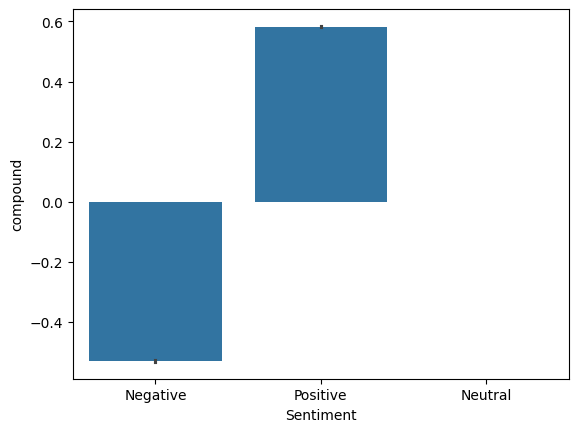

In [30]:
sns.barplot(x='Sentiment', y='compound', data=df)
plt.show()

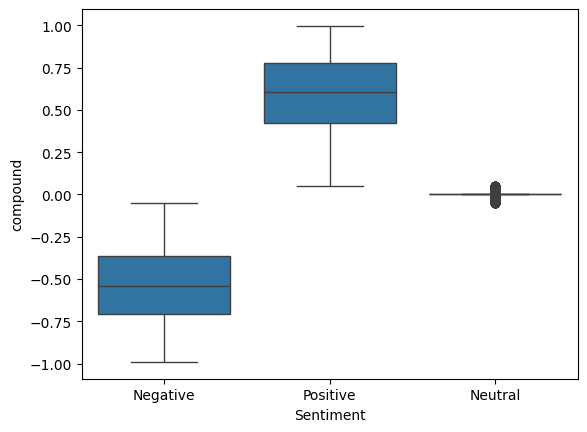

In [31]:
sns.boxplot(x='Sentiment', y='compound', data=df)
plt.show()

<----------------------------------------------------->